# View result of asteroids data set
Written by Kiyoaki Okudaira<br>
*Kyushu University Hanada Lab / University of Washington / IAU CPS SatHub<br>
(okudaira.kiyoaki.528@s.kyushu-u.ac.jp or kiyoaki@uw.edu)<br>
<br>
View result of the processing of asteroids data set from NASA SENTRY / ESA AEGIS API.<br>
<br>
**History**<br>
coding 2026-02-04 : 1st coding<br>
update 2026-02-10 : Add IP distribution and event date plot<br>
update 2026-02-13 : Add velocity infinity<br>
<br>
This code is written for University of Washington ASTR 302 WINTER 2026 Project NEO.<br>
(c) 2026 Kiyoaki Okudaira - Kyushu University Hanada Lab (SSDL) / University of Washington / IAU CPS SatHub

### Import and initial settings
**PATH settings**

In [1]:
base_PATH = "/Users/kiyoaki/VScode/projectneo-2026/"
output_PATH = base_PATH + "data"

**Standard libraries**

In [2]:
import pickle
from matplotlib import pyplot as plt
import numpy as np

### NASA SENTRY vs ESA AEGIS Comparison Dataset
**Import dataset**

In [3]:
with open(f'{output_PATH}/workspace_NASA_ESA_ip_table.pkl', "rb") as f:
    NASA_ESA_ip_table = pickle.load(f)
NASA_ESA_ip_table

des_chr,des_num,event_id,ip_NASA,ip_ESA,v_inf_NASA,v_inf_ESA,v_inf
str9,object,str20,object,object,object,object,float64
1950DA,29075,1950DA_2880-03-16,0.000377,None,14.1,None,14.1
1979XB,None,1979XB_2056-12-12,1.915e-07,2.34e-07,23.7606234552547,25.17,23.7606234552547
1979XB,None,1979XB_2065-12-16,None,2.72e-09,None,25.17,25.17
1979XB,None,1979XB_2086-12-16,1.067e-07,None,23.7606234552547,None,23.7606234552547
1979XB,None,1979XB_2101-12-14,None,3.46e-09,None,25.17,25.17
1979XB,None,1979XB_2102-12-16,1.158e-10,None,23.7606234552547,None,23.7606234552547
1979XB,None,1979XB_2113-12-14,5.532e-07,4.94e-07,23.7606234552547,25.17,23.7606234552547
1991BA,None,1991BA_2026-01-17,None,2.55e-09,None,16.49,16.49
1991BA,None,1991BA_2027-01-19,2.107e-09,3.45e-09,16.7227981196217,16.49,16.7227981196217


**Difference of IP**<br>
If only one of the 2 data set lists an event, the ip_agreements will be `none`

In [4]:
ip_differences = []
ip_agreements = []
years = []
for row in NASA_ESA_ip_table:
    if row["ip_NASA"] is None:
        ip_differences.append(-row["ip_ESA"])
        ip_agreements.append(None)
    elif row["ip_ESA"] is None:
        ip_differences.append(row["ip_NASA"])
        ip_agreements.append(None)
    elif row["ip_NASA"] is None and row["ip_ESA"] is None:
        raise ValueError("Invalid event : both IPs are None")
    else:
        ip_differences.append(row["ip_NASA"] - row["ip_ESA"])
        ip_agreements.append(False)
    years.append(int(row["event_id"][-10:-6]))
NASA_ESA_ip_table["year"] = years
NASA_ESA_ip_table["ip_difference"] = ip_differences
NASA_ESA_ip_table["ip_agreement"] = ip_agreements

NASA_ESA_ip_table

des_chr,des_num,event_id,ip_NASA,ip_ESA,v_inf_NASA,v_inf_ESA,v_inf,year,ip_difference,ip_agreement
str9,object,str20,object,object,object,object,float64,int64,float64,object
1950DA,29075,1950DA_2880-03-16,0.000377,None,14.1,None,14.1,2880,0.000377,None
1979XB,None,1979XB_2056-12-12,1.915e-07,2.34e-07,23.7606234552547,25.17,23.7606234552547,2056,-4.2500000000000017e-08,False
1979XB,None,1979XB_2065-12-16,None,2.72e-09,None,25.17,25.17,2065,-2.72e-09,None
1979XB,None,1979XB_2086-12-16,1.067e-07,None,23.7606234552547,None,23.7606234552547,2086,1.067e-07,None
1979XB,None,1979XB_2101-12-14,None,3.46e-09,None,25.17,25.17,2101,-3.46e-09,None
1979XB,None,1979XB_2102-12-16,1.158e-10,None,23.7606234552547,None,23.7606234552547,2102,1.158e-10,None
1979XB,None,1979XB_2113-12-14,5.532e-07,4.94e-07,23.7606234552547,25.17,23.7606234552547,2113,5.92e-08,False
1991BA,None,1991BA_2026-01-17,None,2.55e-09,None,16.49,16.49,2026,-2.55e-09,None
1991BA,None,1991BA_2027-01-19,2.107e-09,3.45e-09,16.7227981196217,16.49,16.7227981196217,2027,-1.343e-09,False


### Plot result
**IP difference histogram**

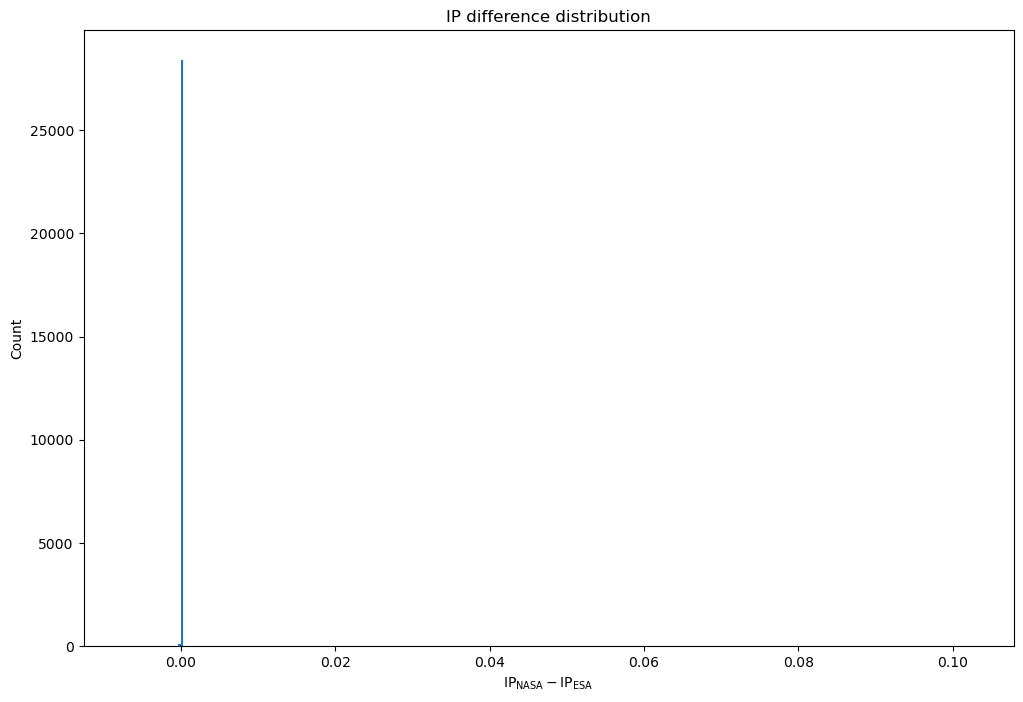

In [5]:
plt.figure(figsize = (12, 8))
_ = plt.hist(NASA_ESA_ip_table["ip_difference"], bins="auto")
# _ = plt.hist(NASA_ESA_ip_table[(NASA_ESA_ip_table["ip_agreement"] != None)]["ip_difference"], bins="auto")
plt.xlabel(r"$\mathrm{IP_{NASA}}-\mathrm{IP_{ESA}}$")
plt.ylabel("Count")
plt.title("IP difference distribution")
plt.show()

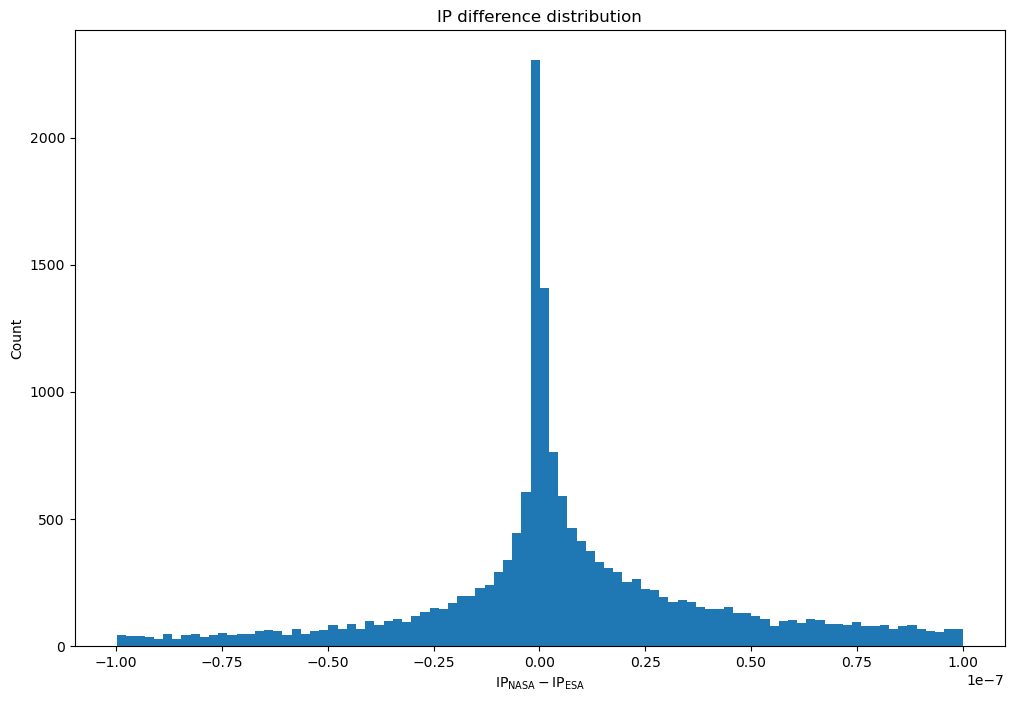

In [6]:
plt.figure(figsize = (12, 8))
_ = plt.hist(NASA_ESA_ip_table[(abs(NASA_ESA_ip_table["ip_difference"]) < 0.0000001)]["ip_difference"], bins="auto")
# _ = plt.hist(NASA_ESA_ip_table[(abs(NASA_ESA_ip_table["ip_difference"]) < 0.0000001) & (NASA_ESA_ip_table["ip_agreement"] != None)]["ip_difference"], bins="auto")
plt.xlabel(r"$\mathrm{IP_{NASA}}-\mathrm{IP_{ESA}}$")
plt.ylabel("Count")
plt.title("IP difference distribution")
plt.show()

**IP distribution histogram**

In [7]:
NASA_ip_list = [0 if f is None else f for f in NASA_ESA_ip_table["ip_NASA"]]
ESA_ip_list = [0 if f is None else f for f in NASA_ESA_ip_table["ip_ESA"]]

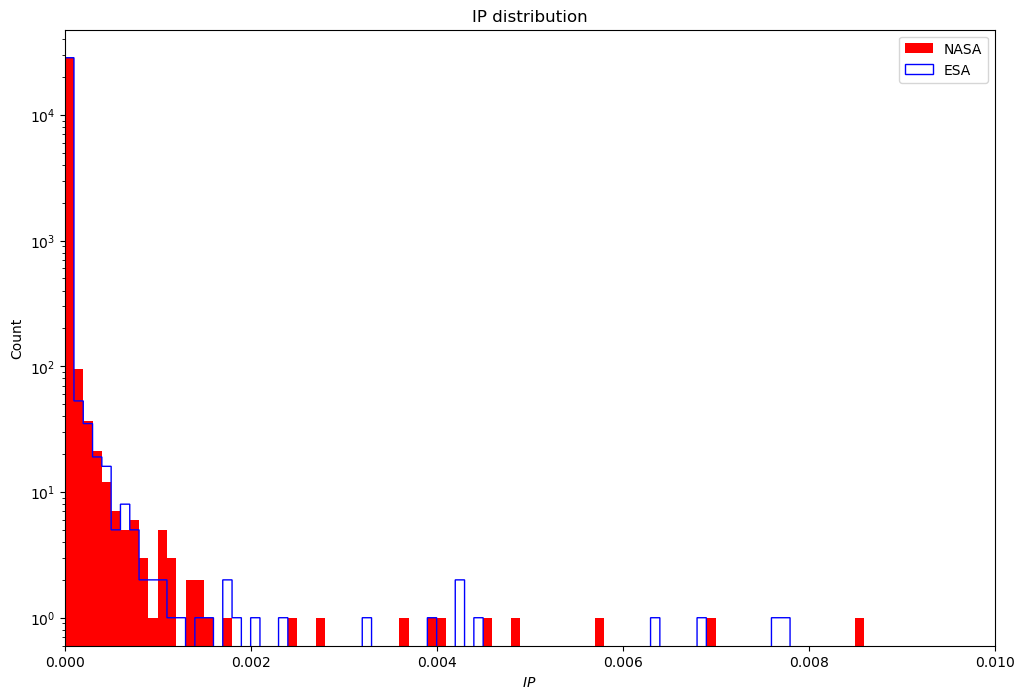

In [8]:
plt.figure(figsize = (12, 8))
_ = plt.hist(NASA_ip_list, bins=1000, range=(0, 0.1), color="r", label = "NASA")
_ = plt.hist(ESA_ip_list, bins=1000, range=(0, 0.1), color="b", histtype='step', linewidth=1, label = "ESA")
plt.xlim((0,0.01))
# plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"${IP}$")
plt.ylabel("Count")
plt.title("IP distribution")
plt.legend()
plt.show()

**IP difference vs Event date**

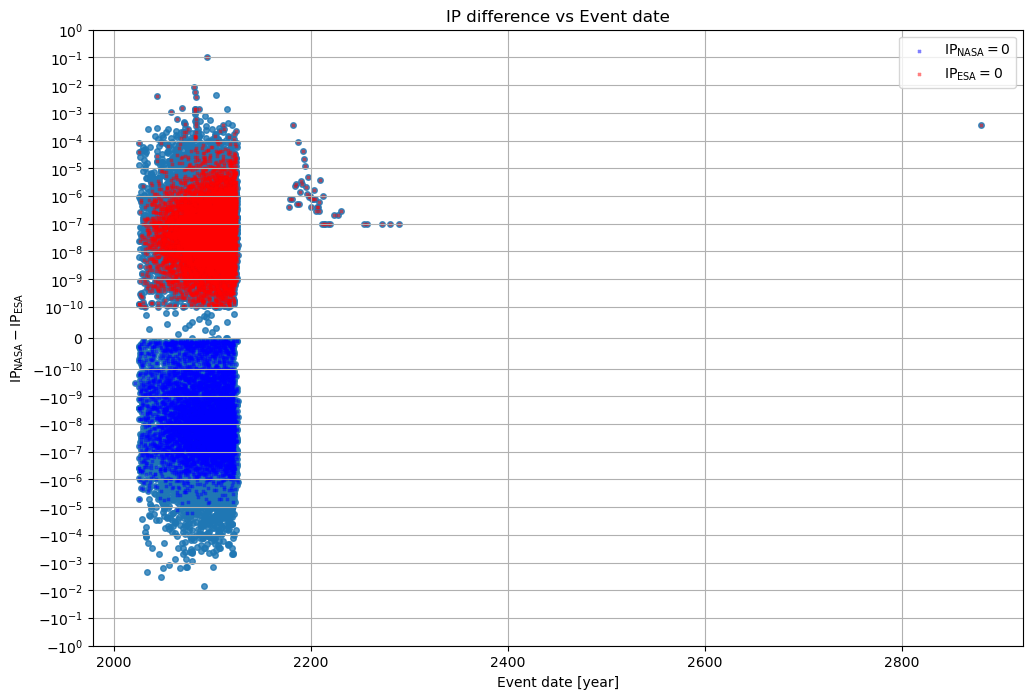

In [9]:
NASA_zero_mask = (NASA_ESA_ip_table["ip_NASA"] == None)
ESA_zero_mask = (NASA_ESA_ip_table["ip_ESA"] == None)


plt.figure(figsize=(12, 8))

plt.scatter(
    NASA_ESA_ip_table["year"],
    NASA_ESA_ip_table["ip_difference"],
    s=16,
    alpha=0.8
)

plt.scatter(
    NASA_ESA_ip_table[NASA_zero_mask]["year"],
    NASA_ESA_ip_table[NASA_zero_mask]["ip_difference"],
    color="blue",
    marker="x",
    s=4,
    alpha=0.5,
    label=r"$\mathrm{IP_{NASA}} = 0$"
)

plt.scatter(
    NASA_ESA_ip_table[ESA_zero_mask]["year"],
    NASA_ESA_ip_table[ESA_zero_mask]["ip_difference"],
    color="red",
    marker="x",
    s=4,
    alpha=0.5,
    label=r"$\mathrm{IP_{ESA}} = 0$"
)

plt.xlabel("Event date [year]")
plt.ylabel(r"$\mathrm{IP_{NASA}}-\mathrm{IP_{ESA}}$")
plt.title("IP difference vs Event date")

plt.ylim(-1, 1)
plt.yscale("symlog", linthresh=1e-10)
plt.grid(True, which="both")
plt.legend()

plt.show()

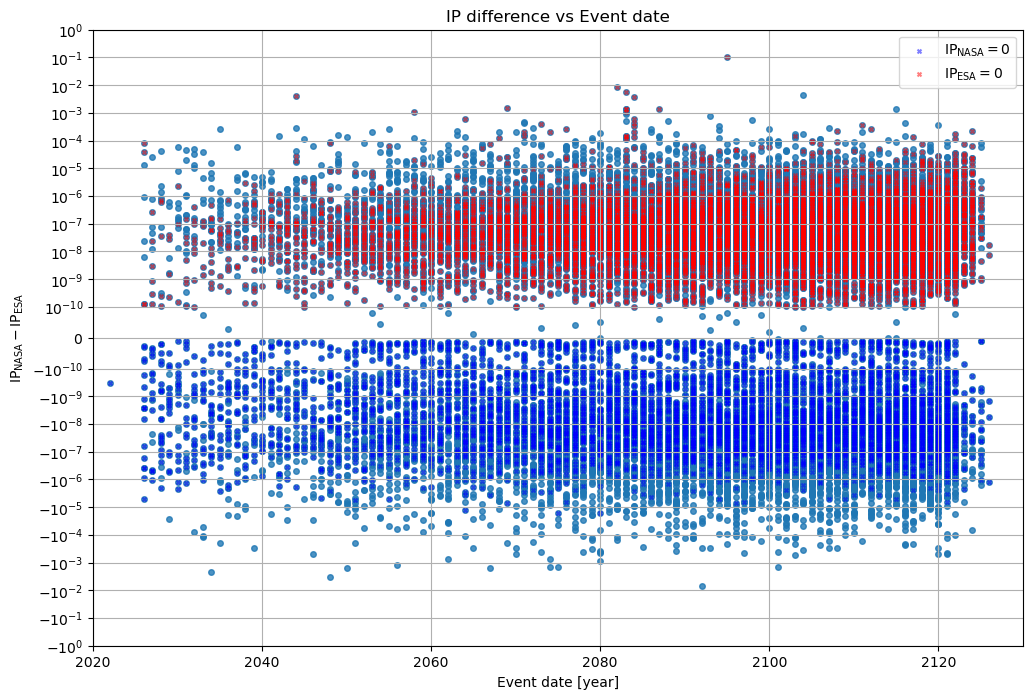

In [10]:
plt.figure(figsize=(12, 8))

plt.scatter(
    NASA_ESA_ip_table["year"],
    NASA_ESA_ip_table["ip_difference"],
    s=16,
    alpha=0.8
)

plt.scatter(
    NASA_ESA_ip_table[NASA_zero_mask]["year"],
    NASA_ESA_ip_table[NASA_zero_mask]["ip_difference"],
    color="blue",
    marker="x",
    s=8,
    alpha=0.5,
    label=r"$\mathrm{IP_{NASA}} = 0$"
)

plt.scatter(
    NASA_ESA_ip_table[ESA_zero_mask]["year"],
    NASA_ESA_ip_table[ESA_zero_mask]["ip_difference"],
    color="red",
    marker="x",
    s=8,
    alpha=0.5,
    label=r"$\mathrm{IP_{ESA}} = 0$"
)

plt.xlabel("Event date [year]")
plt.ylabel(r"$\mathrm{IP_{NASA}}-\mathrm{IP_{ESA}}$")
plt.title("IP difference vs Event date")

plt.xlim(2020, 2130)
plt.ylim(-1, 1)
plt.yscale("symlog", linthresh=1e-10)
plt.grid(True, which="both")
plt.legend()

plt.show()

**IP difference vs Velocity infinity**

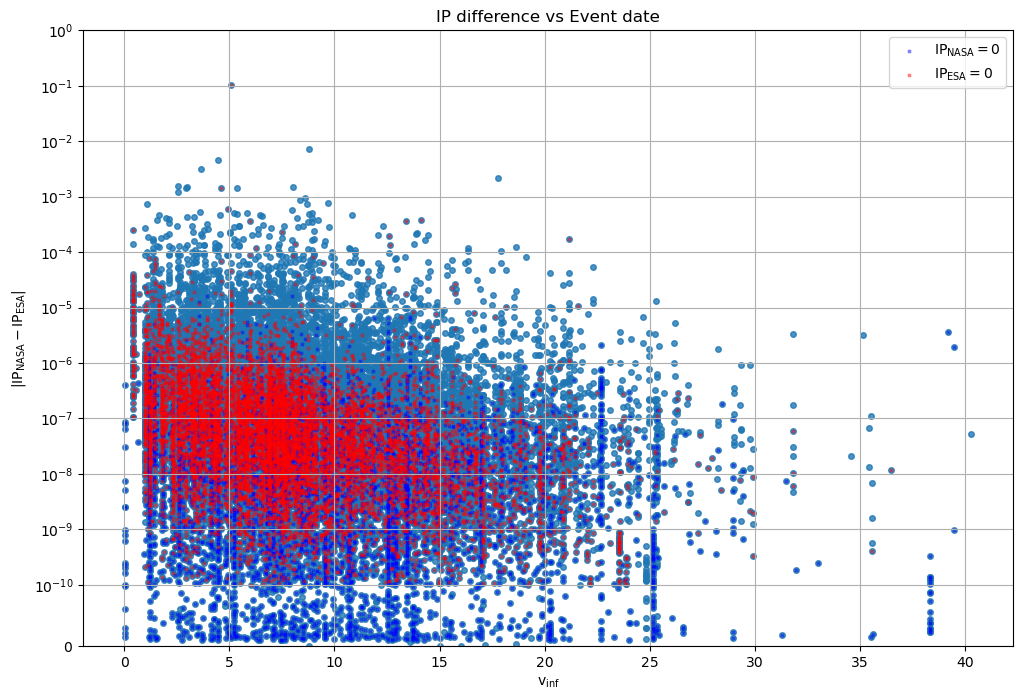

In [11]:
NASA_zero_mask = (NASA_ESA_ip_table["ip_NASA"] == None)
ESA_zero_mask = (NASA_ESA_ip_table["ip_ESA"] == None)

plt.figure(figsize=(12, 8))

plt.scatter(
    NASA_ESA_ip_table["v_inf"],
    abs(NASA_ESA_ip_table["ip_difference"]),
    s=16,
    alpha=0.8
)

plt.scatter(
    NASA_ESA_ip_table[NASA_zero_mask]["v_inf"],
    abs(NASA_ESA_ip_table[NASA_zero_mask]["ip_difference"]),
    color="blue",
    marker="x",
    s=4,
    alpha=0.5,
    label=r"$\mathrm{IP_{NASA}} = 0$"
)

plt.scatter(
    NASA_ESA_ip_table[ESA_zero_mask]["v_inf"],
    abs(NASA_ESA_ip_table[ESA_zero_mask]["ip_difference"]),
    color="red",
    marker="x",
    s=4,
    alpha=0.5,
    label=r"$\mathrm{IP_{ESA}} = 0$"
)

plt.xlabel(r"$\mathrm{v_{inf}}$")
plt.ylabel(r"$|\mathrm{IP_{NASA}}-\mathrm{IP_{ESA}}|$")
plt.title("IP difference vs Event date")

plt.ylim(0, 1)
plt.yscale("symlog", linthresh=1e-10)
plt.grid(True, which="both")
plt.legend()

plt.show()

**IP by NASA vs IP by ESA for each event**<br>
Scatter plot of the IP by NASA vs the IP by ESA

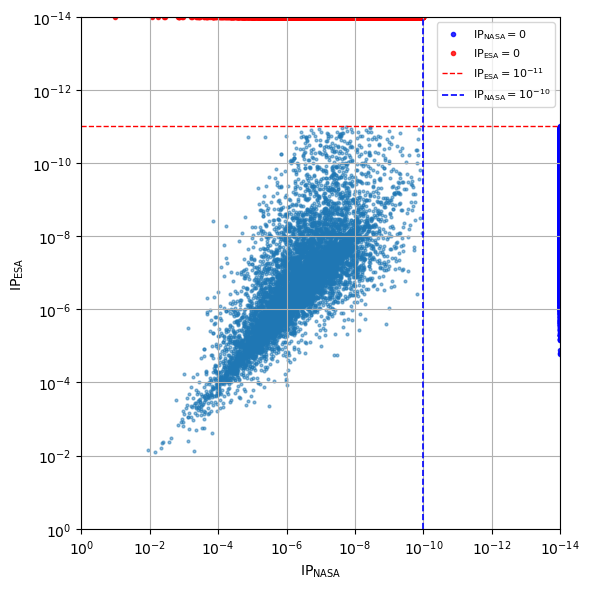

In [12]:
eps = 1e-14

x_raw = np.array([0 if x is None else x for x in NASA_ESA_ip_table["ip_NASA"]], dtype=float)
y_raw = np.array([0 if x is None else x for x in NASA_ESA_ip_table["ip_ESA"]], dtype=float)

x_plot = np.where(x_raw <= 0, eps, x_raw)
y_plot = np.where(y_raw <= 0, eps, y_raw)
x_zero_mask = (x_raw <= 0)
y_zero_mask = (y_raw <= 0)

plt.figure(figsize=(6,6))
plt.scatter(x_plot, y_plot, s=4, alpha=0.5)
plt.scatter(
    x_plot[x_zero_mask],
    y_plot[x_zero_mask],
    marker=".",
    color="blue",
    alpha=0.8,
    # s=8,
    label=r"$\mathrm{IP_{NASA}} = 0$"
)
plt.scatter(
    x_plot[y_zero_mask],
    y_plot[y_zero_mask],
    marker=".",
    color="red",
    alpha=0.8,
    # s=8,
    label=r"$\mathrm{IP_{ESA}} = 0$"
)

plt.axhline(
    y=1e-11,
    color="red",
    linestyle="--",
    linewidth=1,
    label=r"$\mathrm{IP_{ESA}} = 10^{-11}$"
)

plt.axvline(
    x=1e-10,
    color="blue",
    linestyle="--",
    linewidth=1.2,
    label=r"$\mathrm{IP_{NASA}} = 10^{-10}$"
)

plt.xlabel(r"$\mathrm{IP_{NASA}}$")
plt.ylabel(r"$\mathrm{IP_{ESA}}$")

plt.xscale("log")
plt.yscale("log")

plt.xlim(1, eps)
plt.ylim(1, eps)

plt.grid()
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()